## Intro to Pandas

1. Pengertian dataframe + membuat dataframe dari csv
2. Melihat struktur dataframe \
    a. info umum \
    b. nama kolom \
    c. rekap statistik 
3. Locating dan slicing data (Filtering data)
5. Grouping
6. Columns Operation + visualisation
7. Save data


## 1. Pengertian dataframe + membuat dataframe dari csv

In [1]:
# import fungsi untuk memanggil library / code yang ada di file lainnya
# as itu alias, awalnya namanya pandas kita ubah jadi pd
import pandas as pd

In [2]:
# data extraction process, atau mengambil data dari suatu file, case ini csv
# template pd.read_csv('directory_file/file_name.csv')
df = pd.read_csv('C:/Users/irfan/OneDrive/Documents/project/bi_bootcamp_binar/BIM wave 3/dataset/mart_data_cut.csv') 

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
10001,1000090,P00029242,M,55+,13.0,C,1,0,8,7786
10002,1001519,P00313242,M,18-25,4.0,C,1,0,8,9803
10003,1001519,P00085942,M,18-25,4.0,C,1,0,2,13244
10004,1001519,P00229642,M,18-25,4.0,C,1,0,8,7868


## 2. Melihat struktur dataframe

In [45]:
########### sql
# select *
# from table
# limit 10
########### pandas
# mengambil n data awal / akhir
# template data awal -> nama_var.head(jumlah_n_data_awal)
# template data akhir -> nama_var.tail(jumlah_n_data_akhir)

df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
9996,1001530,P00028842,M,26-35,4.0,A,1,1,6,20138
9997,1001530,P00151742,M,26-35,4.0,A,1,1,8,7967
9998,1001530,P00119742,M,26-35,4.0,A,1,1,5,8590
9999,1001530,P00178842,M,26-35,4.0,A,1,1,2,13147
10000,1001530,P00124842,M,26-35,4.0,A,1,1,11,5975
10001,1000090,P00029242,M,55+,13.0,C,1,0,8,7786
10002,1001519,P00313242,M,18-25,4.0,C,1,0,8,9803
10003,1001519,P00085942,M,18-25,4.0,C,1,0,2,13244
10004,1001519,P00229642,M,18-25,4.0,C,1,0,8,7868
10005,1001519,P00313242,M,18-25,4.0,C,1,0,8,9803


In [6]:
# info umum -> template nama_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10006 non-null  int64  
 1   Product_ID                  10006 non-null  object 
 2   Gender                      10006 non-null  object 
 3   Age                         10006 non-null  object 
 4   Occupation                  9997 non-null   float64
 5   City_Category               10006 non-null  object 
 6   Stay_In_Current_City_Years  10006 non-null  int64  
 7   Marital_Status              10006 non-null  int64  
 8   Product_Category            10006 non-null  object 
 9   Purchase                    10006 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 781.8+ KB


In [7]:
# memunculkan nama column -> template -> nama_df.columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
# mendapatkan rekap statistik dari dataframe
# template -> nama_df.describe()
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase
count,1.000600e+04,9997.000000,10006.000000,10006.000000,1.000600e+04
mean,1.000791e+06,8.433330,1.913552,0.405157,1.773710e+04
std,4.404582e+02,6.659401,1.326553,0.490947,7.832317e+05
min,1.000001e+06,0.000000,0.000000,0.000000,1.860000e+02
25%,1.000403e+06,3.000000,1.000000,0.000000,5.832000e+03
50%,1.000817e+06,7.000000,2.000000,0.000000,8.022000e+03
75%,1.001172e+06,15.000000,3.000000,1.000000,1.192300e+04
max,1.001530e+06,20.000000,4.000000,1.000000,7.795029e+07


In [14]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase
count,10006.00,9997.00,10006.00,10006.00,10006.00
mean,1000791.11,8.43,1.91,0.41,17737.10
std,440.46,6.66,1.33,0.49,783231.68
min,1000001.00,0.00,0.00,0.00,186.00
25%,1000403.00,3.00,1.00,0.00,5832.00
50%,1000817.00,7.00,2.00,0.00,8022.00
75%,1001172.00,15.00,3.00,1.00,11923.00
max,1001530.00,20.00,4.00,1.00,77950291.00


## 3. Locating dan slicing data

### 3.a. Locating data

In [16]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [17]:
######## sql
# select kolom1,
#        kolom2
# from table
######## pandas
# nama_var[[''kolom1, 'kolom2']]
df[['User_ID', 'Age']]

,User_ID,Age
0,1000001,0-17
1,1000001,0-17
2,1000001,0-17
3,1000001,0-17
4,1000002,55+
...,...,...
10001,1000090,55+
10002,1001519,18-25
10003,1001519,18-25
10004,1001519,18-25


In [27]:
# memanggil n kolom dari awal/dari akhir
# template -> nama_var.iloc[index_start_row:index_end_row, index_start_column:index_end_column]
df.iloc[:,0:5]

,User_ID,Product_ID,Gender,Age,Occupation
0,1000001,P00069042,F,0-17,10.0
1,1000001,P00248942,F,0-17,10.0
2,1000001,P00087842,F,0-17,10.0
3,1000001,P00085442,F,0-17,10.0
4,1000002,P00285442,M,55+,16.0
...,...,...,...,...,...
10001,1000090,P00029242,M,55+,13.0
10002,1001519,P00313242,M,18-25,4.0
10003,1001519,P00085942,M,18-25,4.0
10004,1001519,P00229642,M,18-25,4.0


In [26]:
# select all kolom tanpa 2 kolom terakhir
df.iloc[:,:-2]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,P00069042,F,0-17,10.0,A,2,0
1,1000001,P00248942,F,0-17,10.0,A,2,0
2,1000001,P00087842,F,0-17,10.0,A,2,0
3,1000001,P00085442,F,0-17,10.0,A,2,0
4,1000002,P00285442,M,55+,16.0,C,4,0
...,...,...,...,...,...,...,...,...
10001,1000090,P00029242,M,55+,13.0,C,1,0
10002,1001519,P00313242,M,18-25,4.0,C,1,0
10003,1001519,P00085942,M,18-25,4.0,C,1,0
10004,1001519,P00229642,M,18-25,4.0,C,1,0


In [30]:
df.iloc[100:201,:-2]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
100,1000022,P00195942,M,18-25,15.0,A,4,0
101,1000022,P00115642,M,18-25,15.0,A,4,0
102,1000022,P0098242,M,18-25,15.0,A,4,0
103,1000022,P00262242,M,18-25,15.0,A,4,0
104,1000022,P00258742,M,18-25,15.0,A,4,0
...,...,...,...,...,...,...,...,...
196,1000035,P00309542,M,46-50,1.0,C,4,1
197,1000035,P00106742,M,46-50,1.0,C,4,1
198,1000036,P00102642,M,26-35,3.0,B,0,0
199,1000036,P00127442,M,26-35,3.0,B,0,0


In [35]:
df.loc[:50, ['User_ID', 'Gender']]

,User_ID,Gender
0,1000001,F
1,1000001,F
2,1000001,F
3,1000001,F
4,1000002,M
5,1000003,M
6,1000004,M
7,1000004,M
8,1000004,M
9,1000005,M


### 3.b Slicing or Filtering Data

In [40]:
######### sql filter
# select *
# from
# where condition1
######### pandas filter
# nama_var[ (condition1) &/| (condition2) &/| (condition3) ]
# & : and logic, | : or logic

# case condition : cari data yang Stay_In_Current_City_Years kurang dari 2 tahun
#                  dan marital status = 0
df[ (df['Stay_In_Current_City_Years'] < 2) & (df['Marital_Status'] == 0 ) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
14,1000006,P00231342,F,51-55,9.0,A,1,0,5,5378
15,1000006,P00190242,F,51-55,9.0,A,1,0,4,2079
16,1000006,P0096642,F,51-55,9.0,A,1,0,2,13055
17,1000006,P00058442,F,51-55,9.0,A,1,0,5,8851
25,1000009,P00135742,M,26-35,17.0,C,0,0,6,16662
...,...,...,...,...,...,...,...,...,...,...
10001,1000090,P00029242,M,55+,13.0,C,1,0,8,7786
10002,1001519,P00313242,M,18-25,4.0,C,1,0,8,9803
10003,1001519,P00085942,M,18-25,4.0,C,1,0,2,13244
10004,1001519,P00229642,M,18-25,4.0,C,1,0,8,7868


In [41]:
# tolong carikan data pembelian dari user yang gender perempuan ('F') dan Purchase < 3000
df[ (df['Gender'] == 'F') & (df['Purchase'] < 3000) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057
15,1000006,P00190242,F,51-55,9.0,A,1,0,4,2079
70,1000018,P00366542,F,18-25,3.0,B,3,0,5,1780
72,1000018,P00151842,F,18-25,3.0,B,3,0,4,2802
...,...,...,...,...,...,...,...,...,...,...
9768,1001489,P00370242,F,36-45,2.0,A,2,1,5,2032
9769,1001489,P00369742,F,36-45,2.0,A,2,1,5,1851
9770,1001489,P00138542,F,36-45,2.0,A,2,1,5,1774
9933,1001513,P00102642,F,36-45,16.0,C,4,1,4,2804


In [43]:
# tolong carikan data yang berasal dari City_category B  dan Purchase diantara 1000 - 5000
df[(df['City_Category']=='B') & (df['Purchase'] >= 1000 ) & (df['Purchase'] <= 5000 )]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70,1000018,P00366542,F,18-25,3.0,B,3,0,5,1780
72,1000018,P00151842,F,18-25,3.0,B,3,0,4,2802
97,1000021,P00220242,M,18-25,16.0,B,0,0,3,3055
130,1000026,P00043242,M,26-35,7.0,B,2,1,5,1848
131,1000026,P00057242,M,26-35,7.0,B,2,1,5,3624
...,...,...,...,...,...,...,...,...,...,...
9967,1001520,P00019142,M,26-35,17.0,B,1,0,11,1545
9974,1001524,P00249842,M,18-25,4.0,B,1,0,8,1939
9975,1001524,P00278442,M,18-25,4.0,B,1,0,11,4468
9977,1001524,P00316242,M,18-25,4.0,B,1,0,5,1895


In [49]:
# mengurutkan data
########## sql
# select *
# from table
# order by 2
######### pandas
# nama_var.sort_values(by='nama_kolom')

df.sort_values(by=['User_ID', 'Product_ID'], ascending = [False,True])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
9996,1001530,P00028842,M,26-35,4.0,A,1,1,6,20138
9998,1001530,P00119742,M,26-35,4.0,A,1,1,5,8590
10000,1001530,P00124842,M,26-35,4.0,A,1,1,11,5975
9997,1001530,P00151742,M,26-35,4.0,A,1,1,8,7967
9999,1001530,P00178842,M,26-35,4.0,A,1,1,2,13147
...,...,...,...,...,...,...,...,...,...,...
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422


In [51]:
df.iloc[:,:5].sort_values(by=['User_ID', 'Product_ID'], ascending = [False,True])

,User_ID,Product_ID,Gender,Age,Occupation
9996,1001530,P00028842,M,26-35,4.0
9998,1001530,P00119742,M,26-35,4.0
10000,1001530,P00124842,M,26-35,4.0
9997,1001530,P00151742,M,26-35,4.0
9999,1001530,P00178842,M,26-35,4.0
...,...,...,...,...,...
4,1000002,P00285442,M,55+,16.0
0,1000001,P00069042,F,0-17,10.0
3,1000001,P00085442,F,0-17,10.0
2,1000001,P00087842,F,0-17,10.0


## Grouping

In [56]:
######## sql
# select column1,
#        column2,
#        sum(column3)
#        from table
# group by 1,2 
######## pandas
# nama_var[['column1', 'column2', 'column3']].groupby(by=['column1', 'column2']).aggregation_function()
# aggregation_function -> count(), sum(), min(), max(), mean(), median(), percentile -> quantil(.25), nunique() / count distinct
# output series


# case total purchase per user_id
df[['User_ID', 'Purchase']].groupby(by=['User_ID']).sum()

,Purchase
User_ID,
1000001,26049
1000002,7969
1000003,15227
1000004,50755
1000005,38820
...,...
1001525,43372
1001526,14121
1001527,43869


In [55]:
# mengubah hasil group by menjadi datafreamme -> tulis_grouping.reset_index()
df[['User_ID', 'Purchase']].groupby(by=['User_ID']).sum().reset_index()

,User_ID,Purchase
0,1000001,26049
1,1000002,7969
2,1000003,15227
3,1000004,50755
4,1000005,38820
...,...,...
1357,1001525,43372
1358,1001526,14121
1359,1001527,43869
1360,1001528,8743


In [57]:
# tolong buat agregasi data / pengelompokan data seperti berikut
# hitung jumlah user per gender dan City_Category
# nama_var[['column1', 'column2', 'column3']].groupby(by=['column1', 'column2']).aggregation_function()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## 6. Columns Operation + visualisation

In [10]:
# ############# sql
# select column1 + column2 as column3
# from table 
# ############# pandas
# nama_var_df['column1'] + nama_var_df['column2']
# numeric operation

df['stay_marital'] = df['Stay_In_Current_City_Years'] * 2

In [11]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8
5,1000003,P00193542,M,26-35,15.0,A,3,0,1,15227,6
6,1000004,P00184942,M,46-50,7.0,B,2,1,1,19215,4
7,1000004,P00346142,M,46-50,7.0,B,2,1,1,15854,4
8,1000004,P0097242,M,46-50,7.0,B,2,1,1,15686,4
9,1000005,P00274942,M,26-35,20.0,A,1,1,8,7871,2


In [94]:
df['occupation_purchase'] = df['Occupation'] * df['Purchase']

In [98]:
a = df['Occupation'] * df['Purchase']

In [99]:
a

0         83700.0
1        152000.0
2         14220.0
3         10570.0
4        127504.0
           ...   
10001    101218.0
10002     39212.0
10003     52976.0
10004     31472.0
10005     39212.0
Length: 10006, dtype: float64

In [114]:
df['pct_occupation'] = df['Stay_In_Current_City_Years'] / df['Occupation']*100

In [115]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital,product_purchase,split_age,start_age,end_age,occupation_purchase,pct_occupation
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4,,"[0, 17]",0,17,83700.0,20.0
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4,,"[0, 17]",0,17,152000.0,20.0
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4,,"[0, 17]",0,17,14220.0,20.0
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4,,"[0, 17]",0,17,10570.0,20.0
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8,,[55+],55+,None,127504.0,25.0


In [116]:
# dropping columns
# template -> nama_var.drop(['column1', 'column2'], axis = 1) -> axis = 1 hapus columns
df.drop('pct_occupation', axis = 1, inplace = True)

In [117]:
df['pct_occupation'] = df['Stay_In_Current_City_Years'] / df['Occupation']*100;
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital,product_purchase,split_age,start_age,end_age,occupation_purchase,pct_occupation
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4,,"[0, 17]",0,17,83700.0,20.0
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4,,"[0, 17]",0,17,152000.0,20.0
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4,,"[0, 17]",0,17,14220.0,20.0
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4,,"[0, 17]",0,17,10570.0,20.0
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8,,[55+],55+,None,127504.0,25.0


In [118]:
df = df.drop('pct_occupation', axis = 1)

In [119]:
df['pct_occupation'] = df['Stay_In_Current_City_Years'] / df['Occupation']*100;
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital,product_purchase,split_age,start_age,end_age,occupation_purchase,pct_occupation
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4,,"[0, 17]",0,17,83700.0,20.0
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4,,"[0, 17]",0,17,152000.0,20.0
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4,,"[0, 17]",0,17,14220.0,20.0
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4,,"[0, 17]",0,17,10570.0,20.0
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8,,[55+],55+,None,127504.0,25.0


In [120]:
df.drop(columns = 'pct_occupation', inplace = True)

In [121]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital,product_purchase,split_age,start_age,end_age,occupation_purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4,,"[0, 17]",0,17,83700.0
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4,,"[0, 17]",0,17,152000.0
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4,,"[0, 17]",0,17,14220.0
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4,,"[0, 17]",0,17,10570.0
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8,,[55+],55+,None,127504.0


In [36]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'stay_marital', 'product_purchase'],
      dtype='object')

In [37]:
sorting_col = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
               'product_purchase', 'Stay_In_Current_City_Years', 'Marital_Status',
               'Purchase', 'stay_marital', 'Product_Category']

In [122]:
df_sorting = df[sorting_col]

In [123]:
df_sorting.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,product_purchase,Stay_In_Current_City_Years,Marital_Status,Purchase,stay_marital,Product_Category
0,1000001,P00069042,F,0-17,10.0,A,,2,0,8370,4,3
1,1000001,P00248942,F,0-17,10.0,A,,2,0,15200,4,1
2,1000001,P00087842,F,0-17,10.0,A,,2,0,1422,4,12
3,1000001,P00085442,F,0-17,10.0,A,,2,0,1057,4,12
4,1000002,P00285442,M,55+,16.0,C,,4,0,7969,8,8


In [41]:
# string operation columns
df['Gender'].str.lower()

0        f
1        f
2        f
3        f
4        m
        ..
10001    m
10002    m
10003    m
10004    m
10005    m
Name: Gender, Length: 10006, dtype: object

In [63]:
# split text in pandas
# template -> nama_var['column'].str.split('delimiter')
# delimiter = pemisah
df[['start_age', 'end_age']] = df['Age'].str.split('-', expand = True)

In [54]:
df['Age'].str.split('-', expand = True)

,0,1
0,0,17
1,0,17
2,0,17
3,0,17
4,55+,None
...,...,...
10001,55+,None
10002,18,25
10003,18,25
10004,18,25


In [64]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,stay_marital,product_purchase,split_age,start_age,end_age
0,1000001,P00069042,F,0-17,10.0,A,2,0,3,8370,4,3333333333333333333333333333333333333333333333...,"[0, 17]",0,17
1,1000001,P00248942,F,0-17,10.0,A,2,0,1,15200,4,1111111111111111111111111111111111111111111111...,"[0, 17]",0,17
2,1000001,P00087842,F,0-17,10.0,A,2,0,12,1422,4,1212121212121212121212121212121212121212121212...,"[0, 17]",0,17
3,1000001,P00085442,F,0-17,10.0,A,2,0,12,1057,4,1212121212121212121212121212121212121212121212...,"[0, 17]",0,17
4,1000002,P00285442,M,55+,16.0,C,4,0,8,7969,8,8888888888888888888888888888888888888888888888...,[55+],55+,None
5,1000003,P00193542,M,26-35,15.0,A,3,0,1,15227,6,1111111111111111111111111111111111111111111111...,"[26, 35]",26,35
6,1000004,P00184942,M,46-50,7.0,B,2,1,1,19215,4,1111111111111111111111111111111111111111111111...,"[46, 50]",46,50
7,1000004,P00346142,M,46-50,7.0,B,2,1,1,15854,4,1111111111111111111111111111111111111111111111...,"[46, 50]",46,50
8,1000004,P0097242,M,46-50,7.0,B,2,1,1,15686,4,1111111111111111111111111111111111111111111111...,"[46, 50]",46,50
9,1000005,P00274942,M,26-35,20.0,A,1,1,8,7871,2,8888888888888888888888888888888888888888888888...,"[26, 35]",26,35


In [50]:
df['split_age'].str[0]

0          0
1          0
2          0
3          0
4        55+
        ... 
10001    55+
10002     18
10003     18
10004     18
10005     18
Name: split_age, Length: 10006, dtype: object

<Axes: >

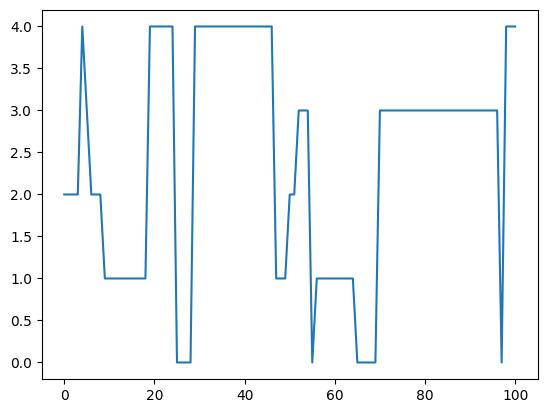

In [66]:
# column visualisation
# nama_var['column1'].plot.chart_type()
# chart_type = bar, line, hist
df.loc[:100, 'Stay_In_Current_City_Years'].plot.line()

<Axes: ylabel='Frequency'>

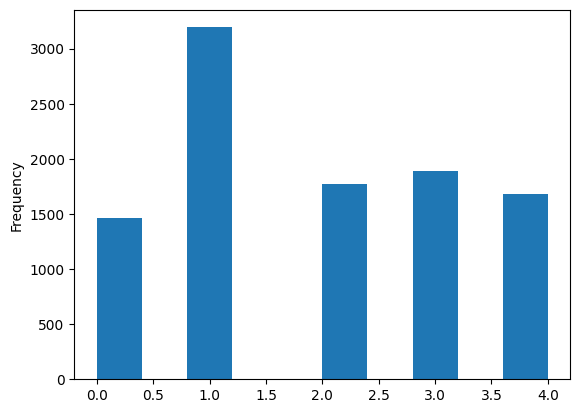

In [68]:
df['Stay_In_Current_City_Years'].plot.hist()

In [70]:
# proporsi user male / female
df[['User_ID','Gender']].groupby(by = 'Gender').nunique()

,User_ID
Gender,
F,369
Female,1
M,992
Male,2


In [74]:
# proporsi jumlah transaksi per city category
df[['User_ID','City_Category']].groupby(by = 'City_Category').count()

,User_ID
City_Category,
A,3341
B,3708
C,2948
a,4
b,5


## 7. Save Data

In [125]:
# save data to csv
# nama_var.to_csv('nama_file.csv', index = False)
df.to_csv('../output/test.csv', index = False)